In [1]:
import os
from skimage import io
from matplotlib.image import imread
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
from plot_utils import plot_utils
import numpy as np
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

# Data Display

In [2]:
img_dir = 'images/'
input_img = []
@interact
def get_image_and_display(image=os.listdir(img_dir)):
    global input_img
    input_img = imread(img_dir + image)
    plt.figure(figsize=(14,8))
    plt.imshow(input_img)   

interactive(children=(Dropdown(description='image', options=('3-elrond.jpeg', '4-dobby.jpg', '1-strasbourg.jpg…

In [11]:
tensor = imread('images/2-gandalf.jpg')
tensor.shape

(375, 500, 3)

In [12]:
tensor = tensor/255.0
image = tensor.reshape(-1,3)
image.shape

(187500, 3)

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
seg_img = km.cluster_centers_[kmeans.labels_]
seg_img = seg_img.reshape(tensor.shape)
seg_img.shape

(375, 500, 3)

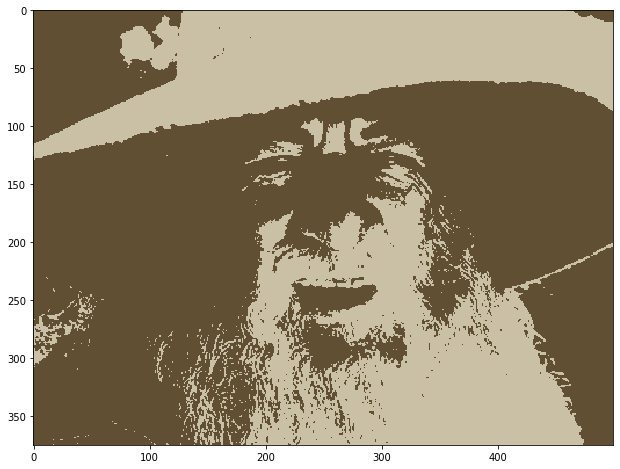

In [25]:
plt.figure(figsize=(14,8))
plt.imshow(seg_img)

# Data Preprocessing

In [4]:
#Data Nromalization and scaling
input_img = input_img/255.0
X = input_img.reshape(-1,3)
X

array([[0.23137255, 0.22745098, 0.05490196],
       [0.30588235, 0.30196078, 0.12941176],
       [0.30196078, 0.29019608, 0.12156863],
       ...,
       [0.36862745, 0.36862745, 0.17254902],
       [0.36862745, 0.36470588, 0.17647059],
       [0.36470588, 0.36078431, 0.18039216]])

# Discussing the color distribution

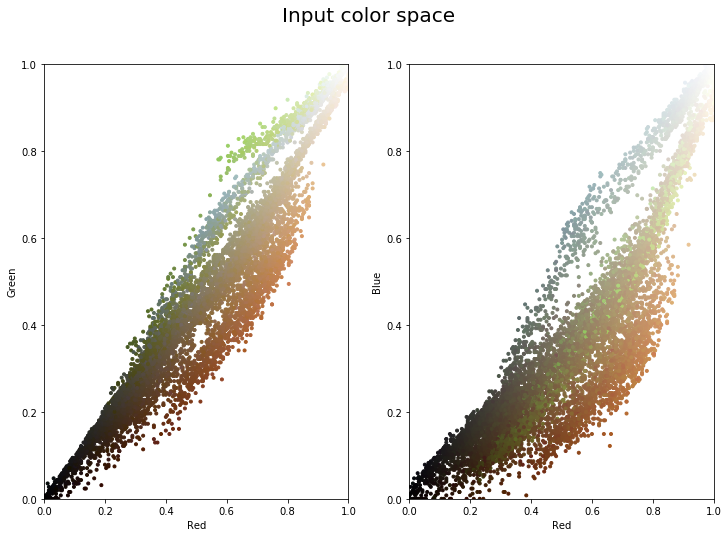

In [5]:
x = plot_utils(X, title='Input color space')
x.colorSpace()

# Model assignment

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters=2)

In [8]:
@interact
def model_assign(k=IntSlider(min=1,max=256,step=1,value=2,continuous_update=False,layout=dict(width='100%'))):
    global km
    km = KMeans(n_clusters=k)
    km.fit(X)
    return km

interactive(children=(IntSlider(value=2, continuous_update=False, description='k', layout=Layout(width='100%')…

# Image Segmentation

In [9]:
segmented_image = km.cluster_centers_
segmented_image = segmented_image[km.labels_]
segmented_image = segmented_image.reshape(input_img.shape)
segmented_image.shape

(375, 500, 3)

# Displaying the results

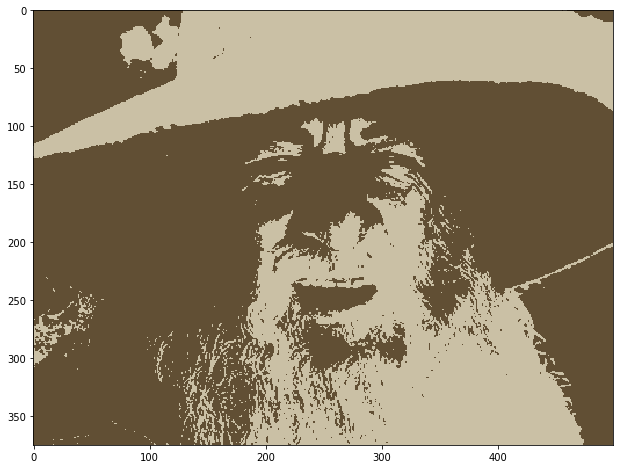

In [10]:
plt.figure(figsize=(14,8))
plt.imshow(segmented_image)

# Color Space of result

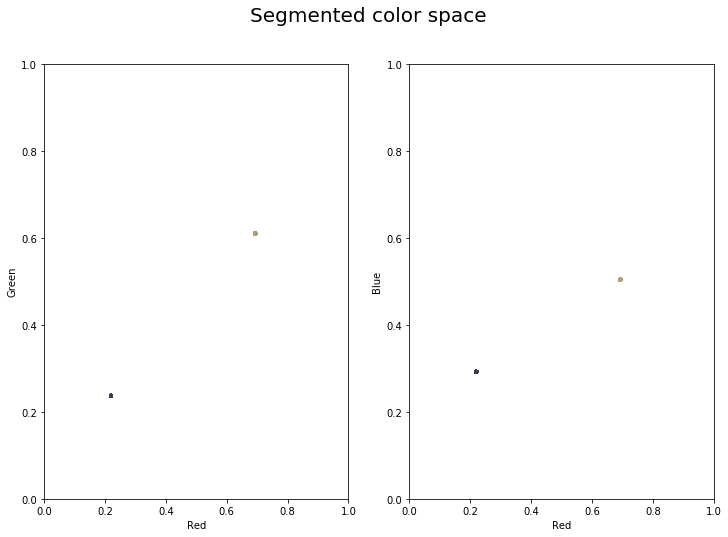

In [23]:
y = plot_utils(segmented_image.reshape(-1,3), title='Segmented color space')
y.colorSpace()